# EDA

## Importações

In [1]:
import string
letters = list(string.ascii_lowercase)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Leitura dos dados pré-processados

In [2]:
df = pd.read_csv('../data/arquivo_preprocessado.csv')

In [3]:
df.shape

(999999, 29)

In [4]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationInSeconds,taxesFare
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach,8940.0,30.93
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach,9000.0,30.93
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach,9000.0,30.93
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach,9120.0,30.93
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach,9240.0,30.93


In [5]:
TARGET = "totalFare"

## Categorização

Utilizamos o qcut, iniciando o número de quantis com 5, para categorizar as colunas numéricas, sem a variável target.
Também removemos a coluna elapseDays pela baixa variaedade.

In [6]:
def create_labels(bins):
    
    labels = []

    for i in range(len(bins)-1):
        label = f"{letters[i]}_({round(bins[i], 2)}_{round(bins[i+1], 2)}]"
        labels.append(label)
    return labels

def categorize_column(data, column, q=5):

    _, bins = pd.qcut(data[column], q=q, retbins=True)
    bins[0] = -np.inf
    bins[-1] = np.inf

    labels = create_labels(bins)

    data[f"{column}_cat"] = pd.cut(data[column], bins=bins, labels=labels)

    return data

In [7]:
numeric_cols = list(df.select_dtypes(include='number').columns)
numeric_cols.remove(TARGET)
numeric_cols.remove('elapsedDays')
numeric_cols

['baseFare',
 'seatsRemaining',
 'totalTravelDistance',
 'travelDurationInSeconds',
 'taxesFare']

In [8]:
for col in numeric_cols:
    categorize_column(df, col)

In [9]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationInSeconds,taxesFare,baseFare_cat,seatsRemaining_cat,totalTravelDistance_cat,travelDurationInSeconds_cat,taxesFare_cat
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,8940,947,coach,8940.0,30.93,b_(143.26_218.6],d_(7.0_9.0],b_(762.0_1207.0],a_(-inf_12420.0],a_(-inf_30.93]
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,9000,947,coach,9000.0,30.93,b_(143.26_218.6],b_(2.0_6.0],b_(762.0_1207.0],a_(-inf_12420.0],a_(-inf_30.93]
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,9000,947,coach,9000.0,30.93,b_(143.26_218.6],d_(7.0_9.0],b_(762.0_1207.0],a_(-inf_12420.0],a_(-inf_30.93]
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,9120,947,coach,9120.0,30.93,b_(143.26_218.6],d_(7.0_9.0],b_(762.0_1207.0],a_(-inf_12420.0],a_(-inf_30.93]
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,9240,947,coach,9240.0,30.93,b_(143.26_218.6],d_(7.0_9.0],b_(762.0_1207.0],a_(-inf_12420.0],a_(-inf_30.93]


In [10]:
df.dtypes

legId                                  object
searchDate                             object
flightDate                             object
startingAirport                        object
destinationAirport                     object
fareBasisCode                          object
travelDuration                         object
elapsedDays                             int64
isBasicEconomy                           bool
isRefundable                             bool
isNonStop                                bool
baseFare                              float64
totalFare                             float64
seatsRemaining                          int64
totalTravelDistance                   float64
segmentsDepartureTimeEpochSeconds      object
segmentsDepartureTimeRaw               object
segmentsArrivalTimeEpochSeconds        object
segmentsArrivalTimeRaw                 object
segmentsArrivalAirportCode             object
segmentsDepartureAirportCode           object
segmentsAirlineName               

## Univariada

Podemos observar a quantidade dos aeroportos de embarque, sendo LAX, LGA e BOS os que mais aparecem. E do contrário, OAK, IAD e JFK aprensentam menos quantidade no datase.

Para os aeroportos de desembarque, temos LAX, LGA e DFW em maior quantidade, e novamente, OAK, IAD e JFK, em menos quantidade.

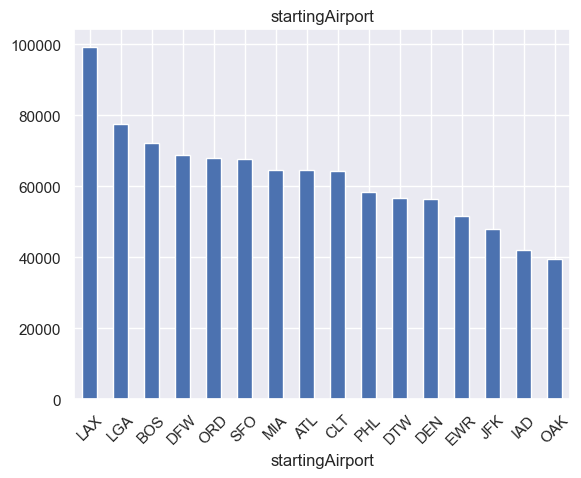

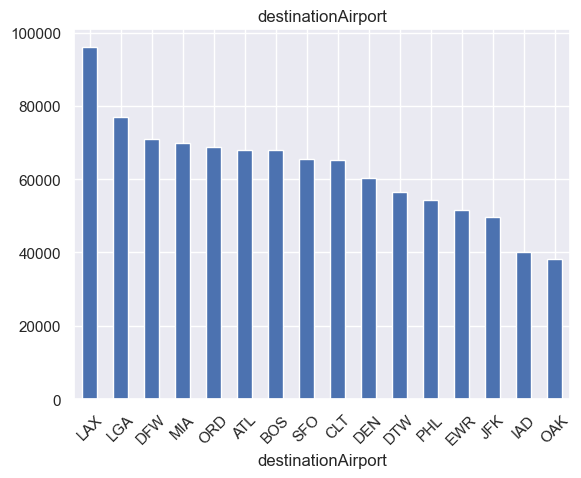

In [37]:
plt.clf()
df['startingAirport'].value_counts().plot(kind='bar')
plt.title('startingAirport')
plt.xticks(rotation=45)
plt.show()

plt.clf()
df['destinationAirport'].value_counts().plot(kind='bar')
plt.title('destinationAirport')
plt.xticks(rotation=45)
plt.show()

Abaixo, podemos observar que a grande maioria dos voos não são de classe econômica e com paradas. E todos não são reembolsaveis.

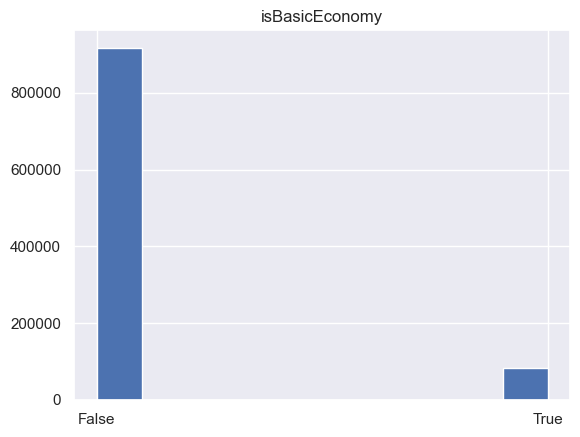

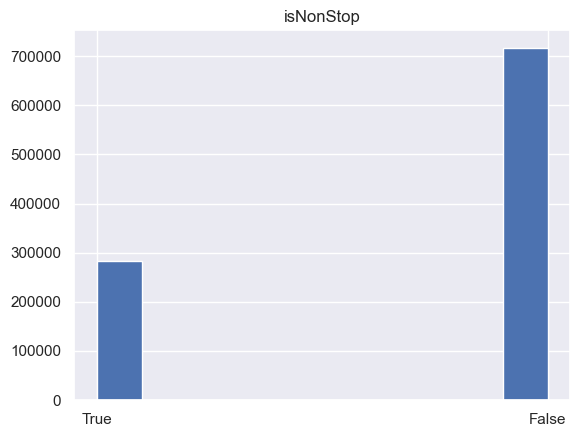

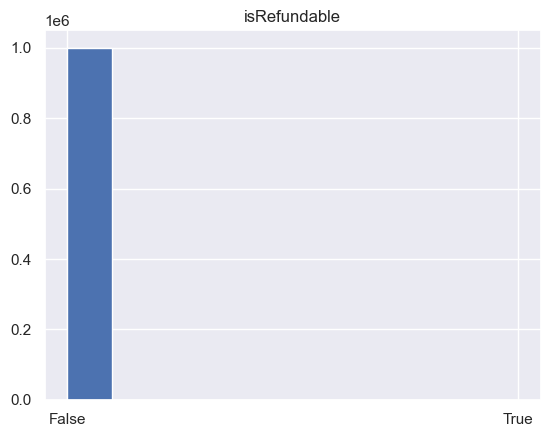

In [29]:
plt.clf()
df['isBasicEconomy'].astype(str).hist()
plt.title('isBasicEconomy')
plt.show()

plt.clf()
df['isNonStop'].astype(str).hist()
plt.title('isNonStop')
plt.show()

plt.clf()
df['isRefundable'].astype(str).hist()
plt.title('isRefundable')
plt.show()

A grande maioria dos voos possuem 7-10 assentos livres.

A maioria está na faixa de até 30.000 segundos (8H30M).

Em relação a distância, temos uma variação dos dados na faixa de 500-1500km e 2500-3000km.

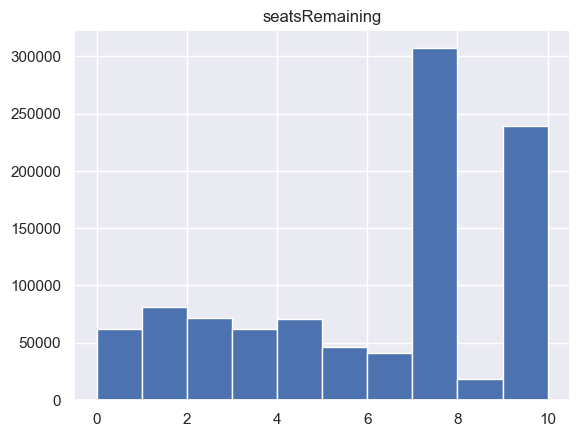

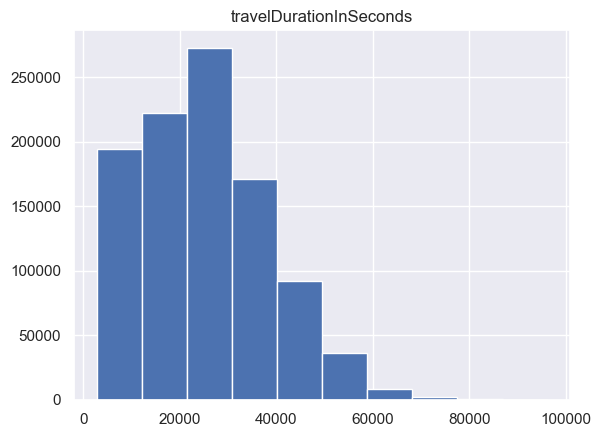

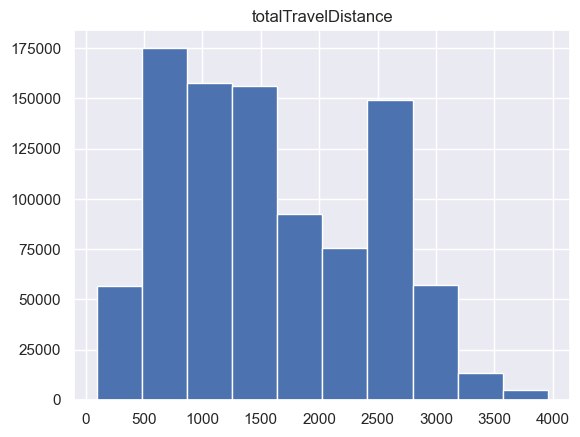

In [25]:

plt.clf()
df['seatsRemaining'].hist()
plt.title('seatsRemaining')
plt.show()

plt.clf()
df['travelDurationInSeconds'].hist()
plt.title('travelDurationInSeconds')
plt.show()

plt.clf()
df['totalTravelDistance'].hist()
plt.title('totalTravelDistance')
plt.show()

Vemos abaixo que a maioria dos voos tem taxas de até $75,00 e preços abaixo de $1.000,00.

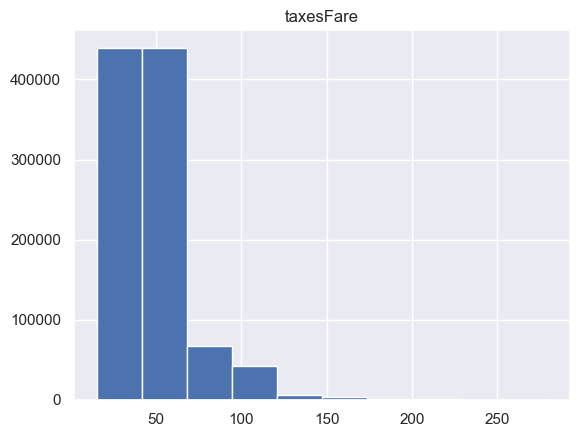

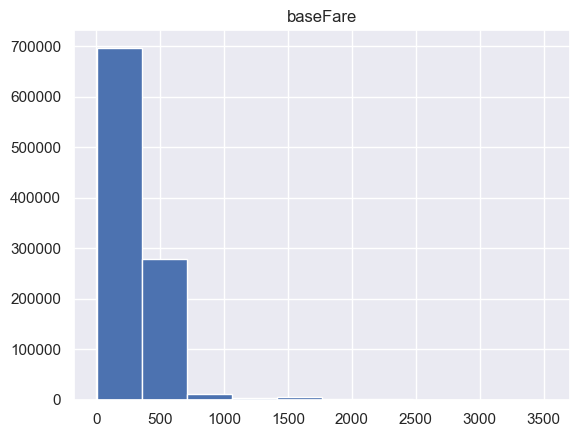

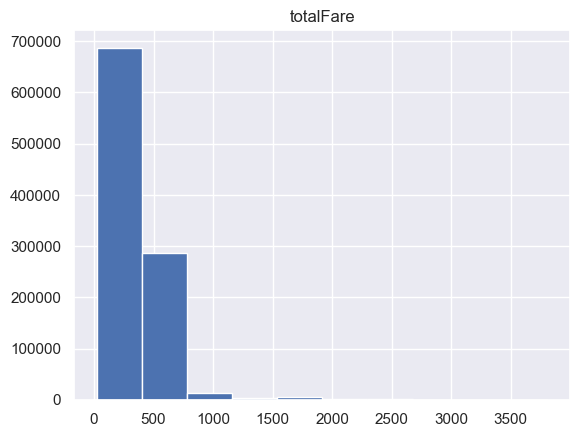

In [30]:
plt.clf()
df['taxesFare'].hist()
plt.title('taxesFare')
plt.show()

plt.clf()
df['baseFare'].hist()
plt.title('baseFare')
plt.show()

plt.clf()
df['totalFare'].hist()
plt.title('totalFare')
plt.show()

## Bivariadas

## Multivariadas